Online Learning Completion Prediction System

=== Dataset Overview ===
Shape: (100, 6)

First 5 rows:
   videos_watched  assignments_submitted  forum_posts  completed  \
0              11                      6            5          1   
1              43                      1           11          0   
2              37                      1            8          0   
3              18                      4           14          1   
4               6                      4           15          1   

   total_engagement  activity_ratio  
0                22        0.500000  
1                55        0.022727  
2                46        0.026316  
3                36        0.210526  
4                25        0.571429  

=== Summary Statistics ===
       videos_watched  assignments_submitted  forum_posts   completed  \
count      100.000000             100.000000   100.000000  100.000000   
mean        23.880000               4.280000     9.500000    0.510000   
std         14

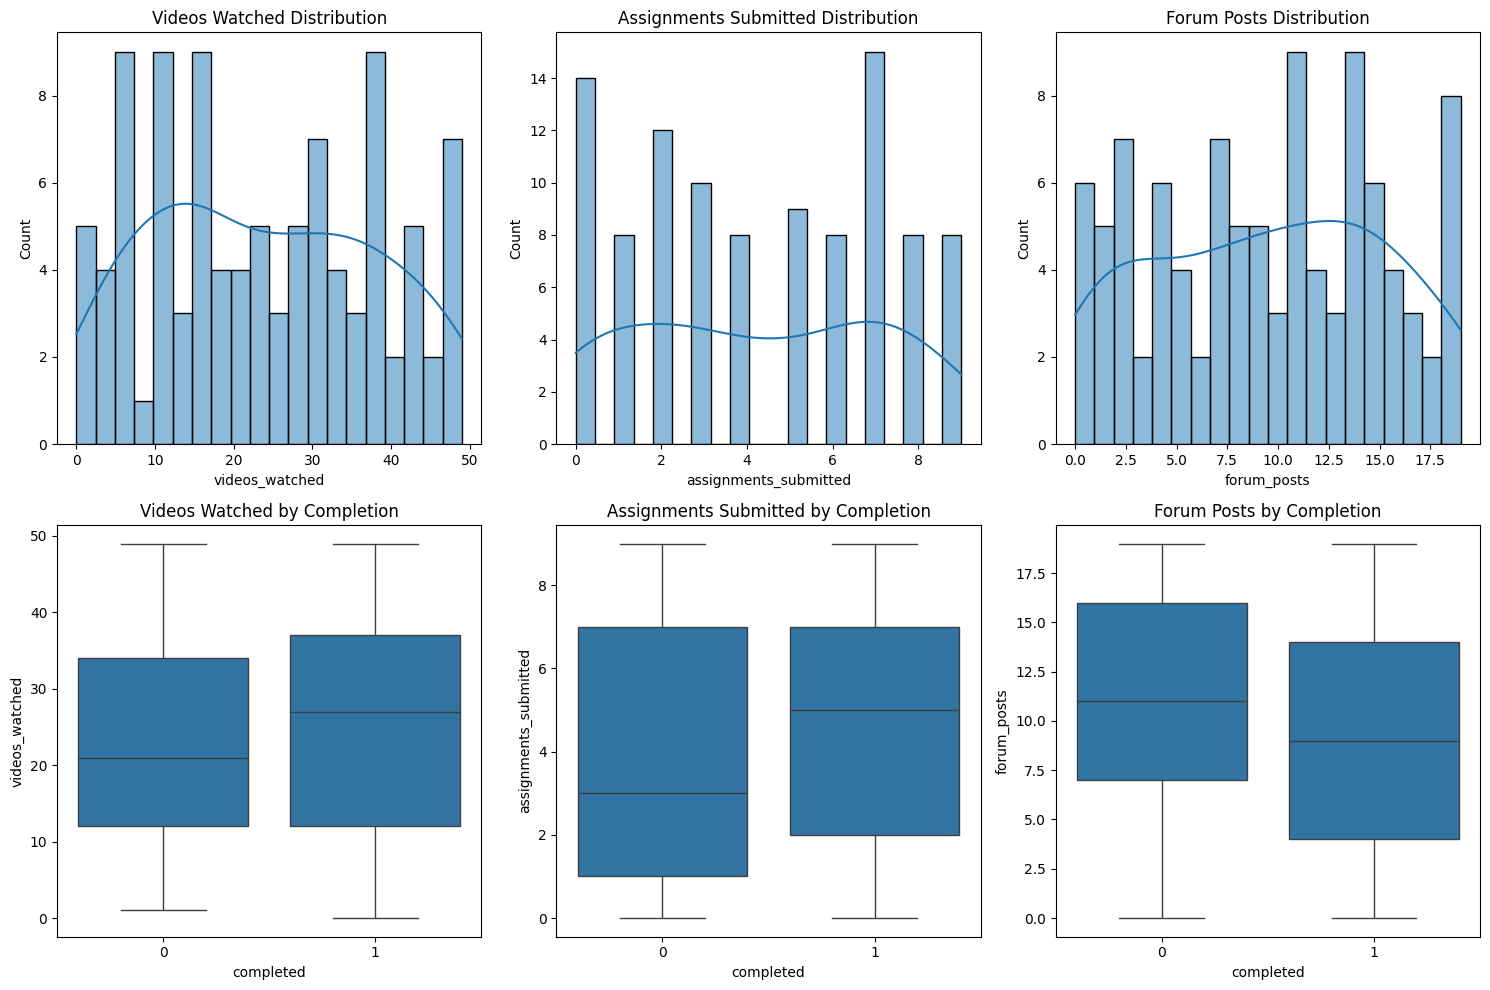

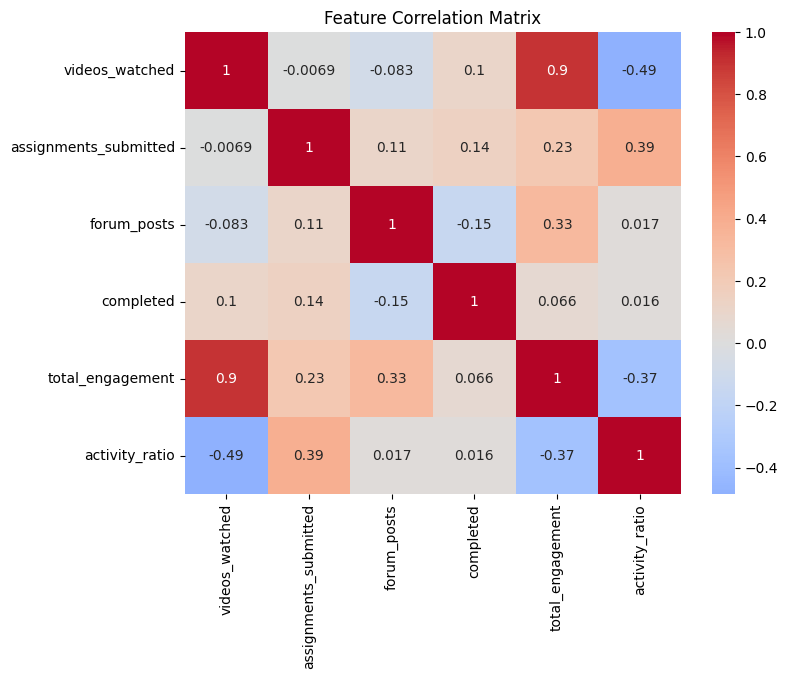


=== Feature Importance Scores ===
                 Feature     Score   P-value
2            forum_posts  2.356267  0.128003
1  assignments_submitted  2.021178  0.158293
0         videos_watched  1.085858  0.299955
3       total_engagement  0.429441  0.513799
4         activity_ratio  0.024862  0.875035

=== Model Evaluation ===
Accuracy: 0.50
AUC-ROC: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.50      0.30      0.38        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



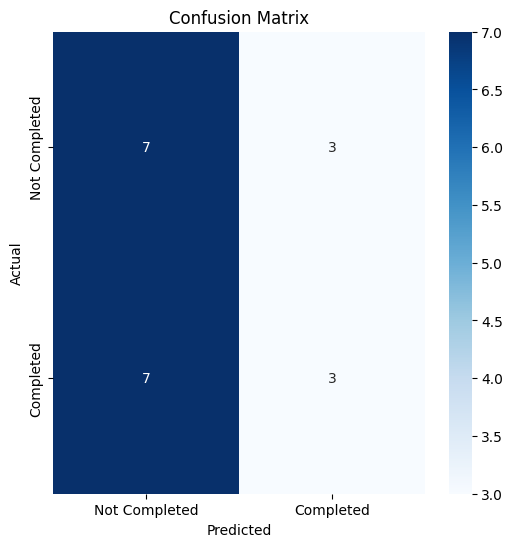

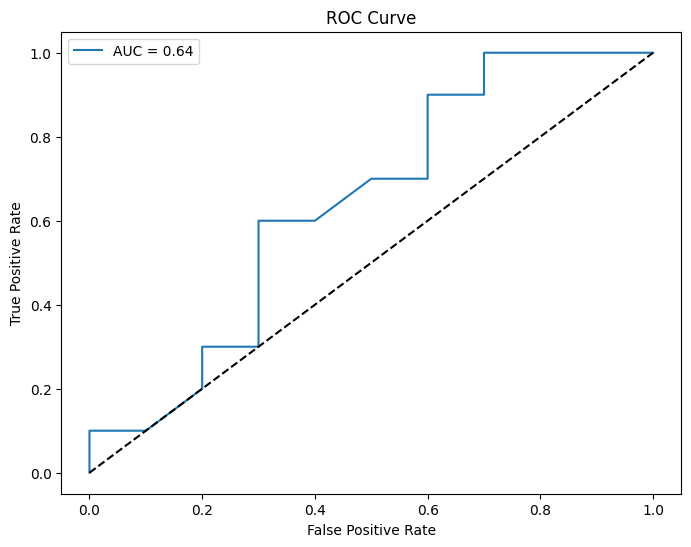

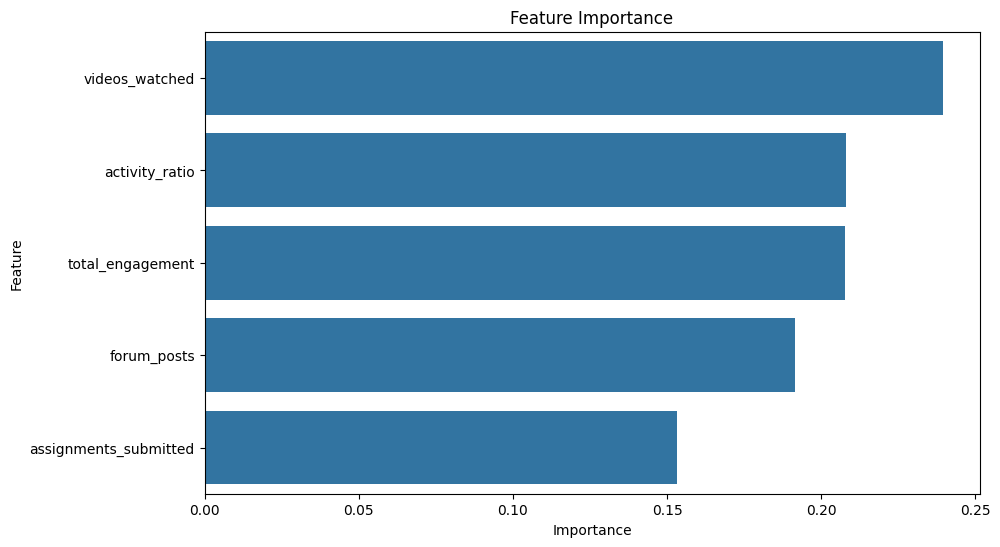

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Set random seed for reproducibility
np.random.seed(42)

# Load and prepare the data
file_path = "/content/online_learning.csv"
def load_and_prepare_data(file_path):
    """
    Load the dataset and prepare it for analysis
    """
    df = pd.read_csv(file_path)

    # Convert 'completed' to binary (1 for 'yes', 0 for 'no')
    df['completed'] = df['completed'].map({'yes': 1, 'no': 0})

    # Create additional features that might be predictive
    df['total_engagement'] = df['videos_watched'] + df['assignments_submitted'] + df['forum_posts']
    df['activity_ratio'] = df['assignments_submitted'] / (df['videos_watched'] + 1)  # +1 to avoid division by zero

    return df

# Exploratory Data Analysis (EDA)
def perform_eda(df):
    """
    Perform exploratory data analysis and visualization
    """
    print("\n=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())

    print("\n=== Summary Statistics ===")
    print(df.describe())

    print("\n=== Completion Rate ===")
    completion_rate = df['completed'].mean()
    print(f"Completion Rate: {completion_rate:.2%}")

    # Visualizations
    plt.figure(figsize=(15, 10))

    # Distribution of features
    plt.subplot(2, 3, 1)
    sns.histplot(df['videos_watched'], bins=20, kde=True)
    plt.title('Videos Watched Distribution')

    plt.subplot(2, 3, 2)
    sns.histplot(df['assignments_submitted'], bins=20, kde=True)
    plt.title('Assignments Submitted Distribution')

    plt.subplot(2, 3, 3)
    sns.histplot(df['forum_posts'], bins=20, kde=True)
    plt.title('Forum Posts Distribution')

    # Completion by feature
    plt.subplot(2, 3, 4)
    sns.boxplot(x='completed', y='videos_watched', data=df)
    plt.title('Videos Watched by Completion')

    plt.subplot(2, 3, 5)
    sns.boxplot(x='completed', y='assignments_submitted', data=df)
    plt.title('Assignments Submitted by Completion')

    plt.subplot(2, 3, 6)
    sns.boxplot(x='completed', y='forum_posts', data=df)
    plt.title('Forum Posts by Completion')

    plt.tight_layout()
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.show()

# Feature selection
def select_features(X, y):
    """
    Select the most important features
    """
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X, y)

    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_,
        'P-value': selector.pvalues_
    }).sort_values('Score', ascending=False)

    print("\n=== Feature Importance Scores ===")
    print(feature_scores)

    return feature_scores

# Model training and evaluation
def train_and_evaluate(X, y):
    """
    Train and evaluate a Random Forest classifier
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("\n=== Model Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Completed', 'Completed'],
                yticklabels=['Not Completed', 'Completed'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

    return model

# Main function
def main():
    # Load and prepare data
    file_path = 'online_learning.csv'
    df = load_and_prepare_data(file_path)

    # Perform EDA
    perform_eda(df)

    # Prepare features and target
    X = df.drop(columns=['completed'])
    y = df['completed']

    # Feature selection
    feature_scores = select_features(X, y)

    # Train and evaluate model
    model = train_and_evaluate(X, y)

    return model

if __name__ == "__main__":
    print("Online Learning Completion Prediction System")
    trained_model = main()